<h1>Prediction using Unsupervised Learning </h1>

### <b>Submitted by Tanisha Bisht</b>

<b>Objective: </b>In this project from the given ‘Iris’ dataset we will predict the optimum number of clusters and will present it visually using the concept of K-means Clustering.

<b>Language: </b>Python
    

<b>K-Means: </b>The objective of K-means is to group similar data points together and discover some new underlying patterns, to achieve this K means look for a fixed number (k) of cluster in a dataset.

<b>About Iris Dataset: </b>This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length,                          stored .The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

<b>Step-0 Importing libraries</b>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

<b>Step-1 Fetching Data from Iris Dataset </b>

In [4]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head(10) #printing first 10 values

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


<b>Step-2 Preparing data</b>

In [5]:
x=df.iloc[:,:].values
soq=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10)
    kmeans.fit(x)
    soq.append(kmeans.inertia_)
print(soq)

[681.3705999999996, 152.34795176035797, 78.851441426146, 57.22847321428572, 46.44618205128204, 39.066035353535376, 34.421674242424245, 30.063110617452732, 27.860259083974775, 25.97513975060029]


<b>Step-3 Plotting the above result</b>

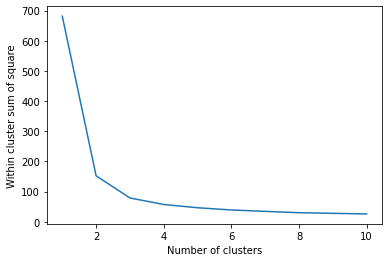

In [6]:
plt.plot(range(1, 11), soq)
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of square') # Within cluster sum of squares
plt.show()

##### Note: When the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration or have the least variance it said to be optimum cluster as above i.e 3

<b>Step-4 Creating Kmeans classifier</b>

In [7]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(x)

<b>Step-5 Visualizing the Cluster </b>

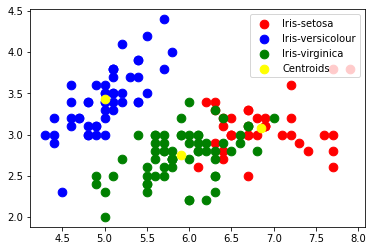

In [8]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s =75, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 75, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 75, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 75, c = 'yellow', label = 'Centroids')
plt.legend(loc='upper right');